I compare the radio-to-optical offsets computed using Gaia DR2 and ICRF3 SX catalog and those using USNO survey (Zacharis &Zacharis 2013) and ICRF2 catalog. 

Since the authors provided two versions of data reduction, this note will include these two catalogs.

In [1]:
from astropy.table import Table, join
from matplotlib import pyplot as plt
import numpy as np

In [2]:
r2o = Table.read("../data/icrf3sx_gedr3.fits")

r2o = r2o["iers_name_icrf3sx", "ra_err_icrf3sx", "dec_err_icrf3sx", 
          "ra", "ra_err_gedr3", "dec", "dec_err_gedr3", 
          "dra_err", "ddec_err",
          "dra", "ddec", "ang_sep"]

r2o.rename_column("iers_name_icrf3sx", "iers_name")

# 1 Use UCAC2 as reference

In [3]:
# Use UCAC2 as the reference catalog
usno2 = Table.read("../data/Zacharis2014-icrf-u2.fits")
usno2.rename_column("Rname", "iers_name")
usno2 = usno2["iers_name", "Dist", "dRA*", "dDec", "eRA", "eDE",
              "sRA", "sDE", "eRad"]

# Cross-match
join_tab2 = join(r2o, usno2, keys="iers_name")

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2


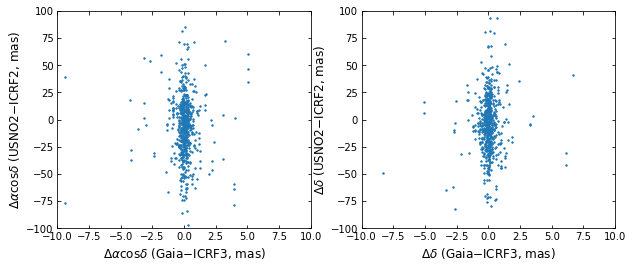

In [4]:
# Compare the position offset
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.scatter(-join_tab2["dra"], join_tab2["dRA*"], s=2)
ax1.scatter(-join_tab2["ddec"], join_tab2["dDec"], s=2)

ax0.set_xlabel("$\Delta\\alpha\cos\delta$ (Gaia$-$ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\Delta\\alpha\cos\delta$ (USNO2$-$ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\Delta\delta$ (Gaia$-$ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\Delta\delta$ (USNO2$-$ICRF2, mas)", fontsize=12)

ax0.axis([-10, 10, -100, 100])
ax1.axis([-10, 10, -100, 100])

plt.subplots_adjust()

Angular separation between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2


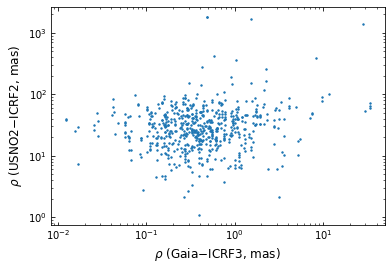

In [5]:
# Angular separation
fig, ax = plt.subplots()
ax.scatter(join_tab2["ang_sep"], join_tab2["Dist"], s=2)
ax.set_xlabel("$\\rho$ (Gaia$-$ICRF3, mas)", fontsize=12)
ax.set_ylabel("$\\rho$ (USNO2$-$ICRF2, mas)", fontsize=12)

ax.set_xscale("log")
ax.set_yscale("log")

print("Angular separation between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2")

Obviously, radio-to-optical offsets calculated from Rio survey and ICRF2 catalog is significantly greater than those from Gaia and ICRF3 catalog.

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2


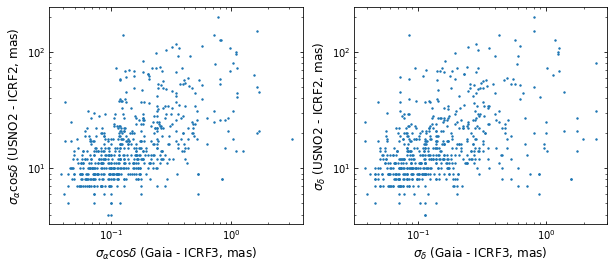

In [6]:
# Compare the position error
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO2 - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.scatter(join_tab2["dra_err"], join_tab2["eRA"], s=2)
ax1.scatter(join_tab2["ddec_err"], join_tab2["eDE"], s=2)

ax0.set_xlabel("$\sigma_\\alpha\cos\delta$ (Gaia - ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\sigma_\\alpha\cos\delta$ (USNO2 - ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\sigma_\delta$ (Gaia - ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\sigma_\delta$ (USNO2 - ICRF2, mas)", fontsize=12)

ax0.set_xscale("log")
ax0.set_yscale("log")

ax1.set_xscale("log")
ax1.set_yscale("log")

plt.subplots_adjust()

The cause of this discrepancy is most likely due to systematic errors in the Rio position, which is similar to those reported by Mignard.

# 1 Use UCAC2 as reference

In [7]:
# Use UCAC4 catalog as the reference
usno4 = Table.read("../data/Zacharis2014-icrf-u4.fits")
usno4.rename_column("Rname", "iers_name")
usno4 = usno4["iers_name", "Dist", "dRA*", "dDec", "eRA", "eDE",
              "sRA", "sDE", "eRad"]

join_tab4 = join(r2o, usno4, keys="iers_name")

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2


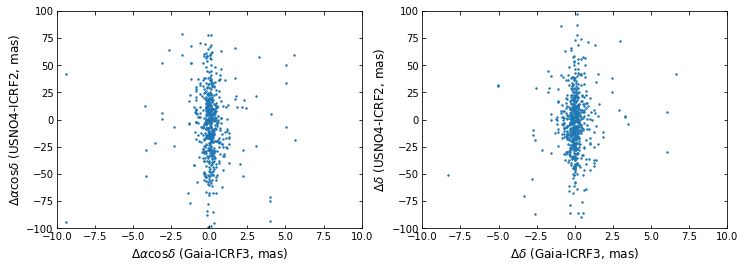

In [8]:
# Compare the position offset
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), ncols=2)

ax0.scatter(-join_tab4["dra"], join_tab4["dRA*"], s=2)
ax1.scatter(-join_tab4["ddec"], join_tab4["dDec"], s=2)

ax0.set_xlabel("$\Delta\\alpha\cos\delta$ (Gaia-ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\Delta\\alpha\cos\delta$ (USNO4-ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\Delta\delta$ (Gaia-ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\Delta\delta$ (USNO4-ICRF2, mas)", fontsize=12)

ax0.axis([-10, 10, -100, 100])
ax1.axis([-10, 10, -100, 100])

plt.subplots_adjust()

Angular separation between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2


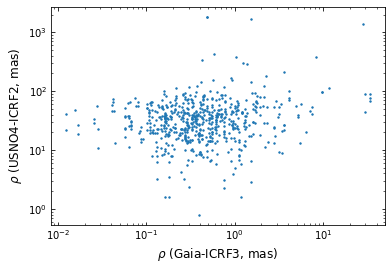

In [9]:
# Angular separation
fig, ax = plt.subplots()
ax.scatter(join_tab4["ang_sep"], join_tab4["Dist"], s=2)
ax.set_xlabel("$\\rho$ (Gaia-ICRF3, mas)", fontsize=12)
ax.set_ylabel("$\\rho$ (USNO4-ICRF2, mas)", fontsize=12)

ax.set_xscale("log")
ax.set_yscale("log")

print("Angular separation between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2")

Obviously, radio-to-optical offsets calculated from Rio survey and ICRF2 catalog is significantly greater than those from Gaia and ICRF3 catalog.

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2


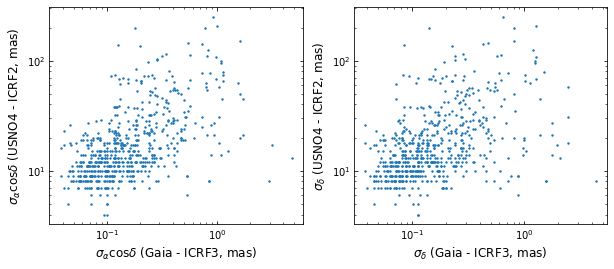

In [10]:
# Compare the position error
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: USNO4 - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.scatter(join_tab4["dra_err"], join_tab4["eRA"], s=2)
ax1.scatter(join_tab4["ddec_err"], join_tab4["eDE"], s=2)

ax0.set_xlabel("$\sigma_\\alpha\cos\delta$ (Gaia - ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\sigma_\\alpha\cos\delta$ (USNO4 - ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\sigma_\delta$ (Gaia - ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\sigma_\delta$ (USNO4 - ICRF2, mas)", fontsize=12)

ax0.set_xscale("log")
ax0.set_yscale("log")

ax1.set_xscale("log")
ax1.set_yscale("log")

plt.subplots_adjust()